Image Classification

## Approach 2 - Feature Extraction

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow
import os
import zipfile

In [ ]:
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d juniorbueno/neural-networks-homer-and-bart-classification

Dataset URL: https://www.kaggle.com/datasets/juniorbueno/neural-networks-homer-and-bart-classification
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 62% 5.00M/8.06M [00:00<00:00, 38.3MB/s]
100% 8.06M/8.06M [00:00<00:00, 55.1MB/s]


In [ ]:
zipref = zipfile.ZipFile('/content/neural-networks-homer-and-bart-classification.zip', mode = 'r')
zipref.extractall()
zipref.close()

### Feature extractor

In [ ]:
files = [os.path.join('/content/homer_bart_1', f) for f in os.listdir('/content/homer_bart_1')]

In [ ]:
export = 'mouth, pants, shoes, tshirts, shorts, sneakers, Class\n'

In [ ]:
show_images = False
features = []

In [ ]:
for image_path in files:
  original_image = cv2.imread(image_path)
  (H, W) = original_image.shape[:2]
  image = original_image.copy()
  image_features = []
  mouth = pants = shoes = 0
  tshirt = shorts = sneakers = 0

  image_name = os.path.basename(os.path.normpath(image_path))
  if image_name.startswith('b'):
    class_name = 0
  else:
    class_name = 1

  for height in range(0, H):
    for width in range(0, W):
      blue = image.item(height, width, 0)
      green = image.item(height, width, 1)
      red = image.item(height, width, 2)

      # Homer - brown mouth
      if (blue >= 95 and blue <= 140 and green >= 160 and green <= 185 and red >= 175 and red <= 200):
        image[height, width] = [0, 255, 255]
        mouth += 1

      # Homer - blue pants
      if (blue >= 150 and blue <= 180 and green >= 98 and green <= 120 and red >= 0 and red <= 90):
        image[height, width] = [0, 255, 255]
        pants += 1

      # Homer - gray shoes
      if height > (H/2):
        if (blue >= 25 and blue <= 45 and green >= 25 and green <= 45 and red >= 25 and red <= 45):
          image[height, width] = [0, 255, 255]
          shoes += 1

      # Homer - orange t-shirt
      if (blue >= 11 and blue <= 22 and green >= 85 and green <= 105 and red >= 240 and red <= 255):
        image[height, width] = [0, 255, 255]
        tshirt += 1

      # Homer - blue shorts
      if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
        image[height, width] = [0, 255, 128]
        shorts += 1

      # Homer - blue sneakers
      if height > (H/2):
        if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
          image[height, width] = [0, 255, 128]
          sneakers += 1

  mouth = round((mouth / (H * W)) * 100, 9)
  pants = round((pants / (H * W)) * 100, 9)
  shoes = round((shoes / (H * W)) * 100, 9)

  tshirt = round((tshirt / (H * W)) * 100, 9)
  shorts = round((shorts / (H * W)) * 100, 9)
  sneakers = round((sneakers / (H * W)) * 100, 9)

  image_features.append(mouth)
  image_features.append(pants)
  image_features.append(shoes)
  image_features.append(tshirt)
  image_features.append(shorts)
  image_features.append(sneakers)
  image_features.append(class_name)

  features.append(image_features)

  # print('Homer mouth: %s - Homer pants: %s - Homer shoes: %s' % (image_features[0], image_features[1], image_features[2]))
  # print('Bart t-shirt: %s - Bart shorts: %s - Bart sneakers: %s' % (image_features[3], image_features[4], image_features[5]))

  f = (','.join([str(item) for item in image_features]))
  export += f + '\n'

  if show_images == True:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    fig, im = plt.subplots(1, 2)
    im[0].axis('off')
    im[0].imshow(original_image)
    im[1].axis('off')
    im[1].imshow(image)
    plt.show()

In [ ]:
export

'mouth, pants, shoes, tshirts, shorts, sneakers, Class\n1.862687235,8.791415663,0.221833279,0.0,0.0,0.0,1\n0.0,0.0,0.076660132,9.58125974,6.173025687,6.173025687,0\n7.385644191,0.0,0.11119025,0.0,0.0,0.0,1\n1.448672089,3.566102811,0.060380396,0.0,0.0,0.0,1\n0.0,0.0,0.088223514,5.356195672,4.325658429,4.325658429,0\n4.264975221,0.0,0.329939668,0.0,0.0,0.0,1\n0.491803279,0.0,0.195081967,0.0,0.0,0.0,1\n0.0,0.0,0.090175198,11.35992786,0.0,0.0,0\n0.0,0.063628651,0.0,0.0,0.0,0.0,1\n0.0,0.0,0.112589904,5.532449419,7.887174834,7.887174834,0\n0.0,0.0,0.113855066,9.469978468,5.73372206,5.73372206,0\n0.000558659,0.0,0.094413408,0.0,0.0,0.0,1\n0.092525727,0.178281278,0.146687128,0.0,0.0,0.0,1\n0.0,0.0,0.235437937,10.429447853,0.0,0.0,0\n0.001317263,0.0,0.087817515,0.0,0.0,0.0,0\n0.312468394,0.187906888,0.0,0.0,0.0,0.0,1\n0.0,0.0,0.580333855,0.721749478,0.737235915,0.0,0\n2.510348847,0.0,0.133630737,0.0,0.0,0.0,1\n0.902278636,0.0,0.102879228,0.0,0.0,0.0,1\n0.028068487,0.0,0.0,0.0,0.0,0.0,1\n0.0,0.0

In [ ]:
with open('features.csv', 'w') as file:
  for l in export:
    file.write(l)
file.closed

True

In [ ]:
dataset = pd.read_csv('features.csv')

In [ ]:
dataset.head()

,mouth,pants,shoes,tshirts,shorts,sneakers,Class
0,1.862687,8.791416,0.221833,0.000000,0.000000,0.000000,1
1,0.000000,0.000000,0.076660,9.581260,6.173026,6.173026,0
2,7.385644,0.000000,0.111190,0.000000,0.000000,0.000000,1
3,1.448672,3.566103,0.060380,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.088224,5.356196,4.325658,4.325658,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mouth      269 non-null    float64
 1    pants     269 non-null    float64
 2    shoes     269 non-null    float64
 3    tshirts   269 non-null    float64
 4    shorts    269 non-null    float64
 5    sneakers  269 non-null    float64
 6    Class     269 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 14.8 KB


### Train and Test sets

In [ ]:
dataset.columns

Index(['mouth', ' pants', ' shoes', ' tshirts', ' shorts', ' sneakers',
       ' Class'],
      dtype='object')

In [ ]:
X = dataset.drop(' Class', axis = 1)
y = dataset[' Class']

In [ ]:
X

,mouth,pants,shoes,tshirts,shorts,sneakers
0,1.862687,8.791416,0.221833,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.076660,9.581260,6.173026,6.173026
2,7.385644,0.000000,0.111190,0.000000,0.000000,0.000000
3,1.448672,3.566103,0.060380,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.088224,5.356196,4.325658,4.325658
...,...,...,...,...,...,...
264,0.072990,0.000000,0.030413,0.000000,0.000000,0.000000
265,1.954777,12.935145,0.020664,0.000000,0.000000,0.000000
266,0.000000,0.000000,0.145934,0.000000,0.000000,0.000000
267,0.129450,0.000000,0.220989,3.006010,1.178456,1.178456


In [ ]:
y

0      1
1      0
2      1
3      1
4      0
      ..
264    1
265    1
266    0
267    0
268    0
Name:  Class, Length: 269, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
train_X, test_X, train_y, test_y = tts(X, y, train_size = 0.8, random_state = 28)

In [ ]:
train_X.shape, train_y.shape

((215, 6), (215,))

In [ ]:
test_X.shape, test_y.shape

((54, 6), (54,))

### Building and training a neural network

In [ ]:
from tensorflow.keras.models import Sequential as SQ
from tensorflow.random import set_seed as SEED
from tensorflow.keras.losses import BinaryCrossentropy as BCE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Activation

In [ ]:
# @title Creating a neural network
# Setting up random seed
SEED(28)

# Creating a neural network
model_1 = SQ()
model_1.add(Dense(6, activation = 'relu'))
model_1.add(Dense(100, activation = 'relu'))
model_1.add(Dense(50, activation = 'relu'))
model_1.add(Dense(100, activation = 'relu'))
model_1.add(Dense(1, activation = 'relu'))

In [ ]:
# @title Compiling the model
model_1.compile(loss = BCE(),
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
# @title Fitting the model
history = model_1.fit(train_X, train_y, epochs = 20, validation_data = [test_X, test_y])

<Axes: >

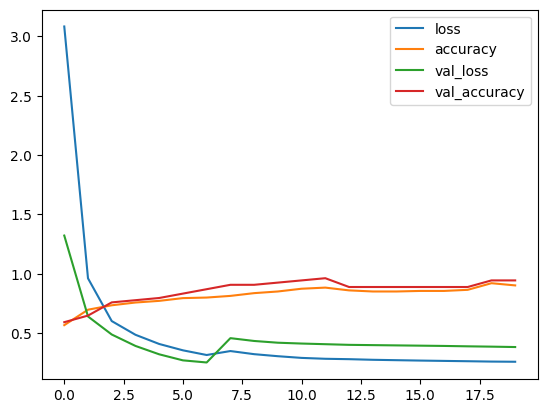

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_1.evaluate(test_X, test_y)

2/2 [==============================] - 0s 6ms/step - loss: 0.3831 - accuracy: 0.9444


[0.3830873370170593, 0.9444444179534912]

In [ ]:
predictions = model_1.predict(test_X)
predictions = (predictions > 0.5)

2/2 [==============================] - 0s 6ms/step


In [ ]:
predictions = predictions.astype(int)

In [ ]:
predictions = np.array(predictions.squeeze())

In [ ]:
expected = np.array(test_y)

In [ ]:
from sklearn.metrics import accuracy_score

round(accuracy_score(expected, predictions), 2)

0.94

<Axes: >

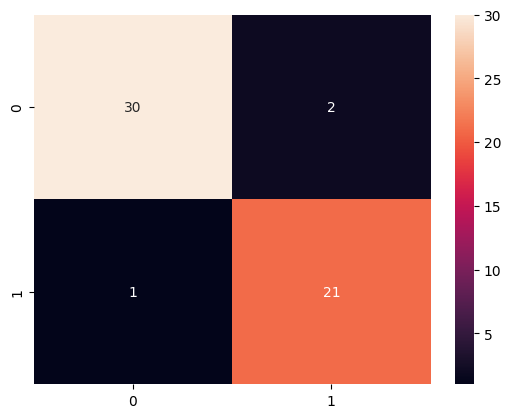

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(expected, predictions)
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(expected, predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.91      0.95      0.93        22

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



In [ ]:
# @title Visualizing the images and predicting their class
import random
num_tracker = []

def random_img_predictor(random_num = None):
  export = 'mouth, pants, shoes, tshirts, shorts, sneakers, Class\n'
  features = []
  if random_num == None:
    # Selecting a random image
    value = False
    while value == False:
      random_num = random.randint(0, len(test_X)-1)
      if random_num not in num_tracker:
        value = True

  num_tracker.append(random_num)
  img = cv2.imread(files[random_num])
  resized_img = cv2.resize(img, (384, 384))

  # Extracting the features
  img_copy = resized_img.copy()
  (H, W) = img_copy.shape[:2]
  image_features = []
  mouth = pants = shoes = 0
  tshirt = shorts = sneakers = 0

  # Assigning the expected values
  image_name = os.path.basename(os.path.normpath(files[random_num]))
  if image_name.startswith('b'):
    class_name = 0
  else:
    class_name = 1

  for height in range(0, H):
    for width in range(0, W):
      blue = image.item(height, width, 0)
      green = image.item(height, width, 1)
      red = image.item(height, width, 2)

      # Homer - brown mouth
      if (blue >= 95 and blue <= 140 and green >= 160 and green <= 185 and red >= 175 and red <= 200):
        image[height, width] = [0, 255, 255]
        mouth += 1

      # Homer - blue pants
      if (blue >= 150 and blue <= 180 and green >= 98 and green <= 120 and red >= 0 and red <= 90):
        image[height, width] = [0, 255, 255]
        pants += 1

      # Homer - gray shoes
      if height > (H/2):
        if (blue >= 25 and blue <= 45 and green >= 25 and green <= 45 and red >= 25 and red <= 45):
          image[height, width] = [0, 255, 255]
          shoes += 1

      # Homer - orange t-shirt
      if (blue >= 11 and blue <= 22 and green >= 85 and green <= 105 and red >= 240 and red <= 255):
        image[height, width] = [0, 255, 255]
        tshirt += 1

      # Homer - blue shorts
      if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
        image[height, width] = [0, 255, 128]
        shorts += 1

      # Homer - blue sneakers
      if height > (H/2):
        if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
          image[height, width] = [0, 255, 128]
          sneakers += 1

  # Converting the values in range of (0, 10)
  mouth = round((mouth / (H * W)) * 100, 9)
  pants = round((pants / (H * W)) * 100, 9)
  shoes = round((shoes / (H * W)) * 100, 9)

  tshirt = round((tshirt / (H * W)) * 100, 9)
  shorts = round((shorts / (H * W)) * 100, 9)
  sneakers = round((sneakers / (H * W)) * 100, 9)

  image_features.append(mouth)
  image_features.append(pants)
  image_features.append(shoes)
  image_features.append(tshirt)
  image_features.append(shorts)
  image_features.append(sneakers)
  image_features.append(class_name)

  features.append(image_features)

  # Joining the image features in a single file
  f = (','.join([str(item) for item in image_features]))
  export += f + '\n'

  # Creating a csv files for passing it to the model
  with open('image.csv', 'w') as file:
    for l in export:
      file.write(l)

  # Opening the image csv with features extracted
  image_df = pd.read_csv('image.csv')
  X = image_df.drop(' Class', axis = 1)
  y = image_df[' Class']

  # predicting the image
  prediction = model_1.predict(X)
  prediction = (prediction > 0.5).astype(int)
  label_pred = 'bart' if prediction == 0 else 'homer'
  label_exp = 'bart' if y[0] == 0 else 'homer'
  # Visualizing the image
  cv2.putText(img_copy, 'Predicted: ' + label_pred, (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0) if label_pred == label_exp else (0, 0, 255), 2)
  cv2.putText(img_copy, 'Expected: ' + label_exp, (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0), 2)
  cv2_imshow(img_copy)

1/1 [==============================] - 0s 23ms/step


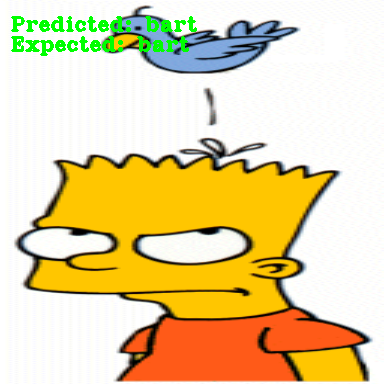

1/1 [==============================] - 0s 19ms/step


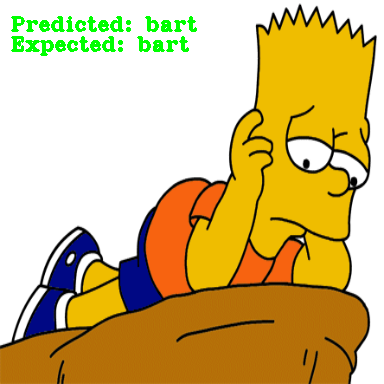

1/1 [==============================] - 0s 19ms/step


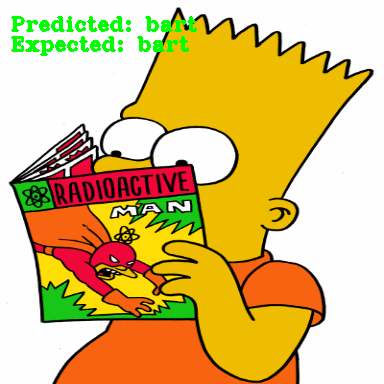

1/1 [==============================] - 0s 19ms/step


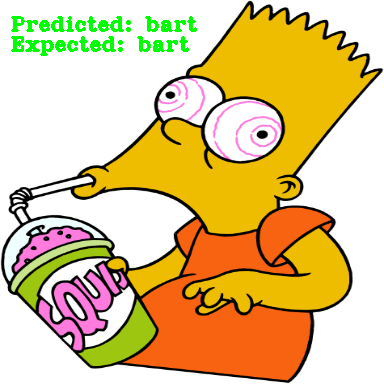

1/1 [==============================] - 0s 19ms/step


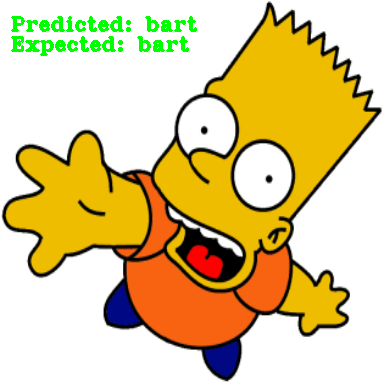

In [ ]:
for i in range(5):
  random_img_predictor()
  i += 1